In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
from imputation import run_comparing
from utils.forgetter import forget_random_col_per_sample_2

In [3]:
seed = 42

In [4]:
random_state = np.random.RandomState(seed)
random_generator = np.random.default_rng(seed)

In [5]:
qualitative_cols_f = open('data/qualitative_cols.json', 'r')
categorical_cols_f = open('data/categorical_cols.json', 'r')

In [6]:
complete_vals_df = pd.read_csv("data/5-train_df.csv", index_col="Unnamed: 0") 
remove_vals_df = pd.read_csv("data/5-test_df.csv", index_col="Unnamed: 0") 
missing_vals_idxs = list(remove_vals_df.index)

In [7]:
sel_qual_cols = json.load(qualitative_cols_f)
sel_cat_cols = json.load(categorical_cols_f)

In [8]:
weight_map = {
    "age" : 1,
    "T3"  : 1,
    "T4U" : 1,
    "TSH" : 1,
    "TT4" : 1,
    "FTI" : 1
}

In [9]:
missing_vals_df, missing_col_map, missing_vals_idxs, picked_cols = forget_random_col_per_sample_2(remove_vals_df, weight_map, random_generator)

real_df = pd.concat([complete_vals_df, remove_vals_df])
curr_df = pd.concat([complete_vals_df, missing_vals_df])

In [10]:
neighbour_range = range(1, 17)

In [11]:
knn_mse_df, _ = run_comparing(real_df, curr_df, missing_vals_idxs, picked_cols, "kNN", "n_neighbors", "imputer", "neighbours", neighbour_range,
                              config={}, estimator_config={})
knn_mse_df

,neighbours,col,val
0,1,age,548.202830
1,1,T3,0.480497
2,1,T4U,0.015752
3,1,FTI,196.447970
4,1,TT4,223.051094
...,...,...,...
267,16,pregnant,0.000000
268,16,I131_treatment,0.000000
269,16,lithium,0.000000
270,16,sex,0.000000


In [12]:
wknn_mse_df, _ = run_comparing(real_df, curr_df, missing_vals_idxs, picked_cols, "WkNN", "n_neighbors", "imputer", "neighbours", neighbour_range,
                               config={}, estimator_config={})
wknn_mse_df

,neighbours,col,val
0,1,age,548.202830
1,1,T3,0.480497
2,1,T4U,0.015752
3,1,FTI,196.447970
4,1,TT4,223.051094
...,...,...,...
267,16,pregnant,0.000000
268,16,I131_treatment,0.000000
269,16,lithium,0.000000
270,16,sex,0.000000


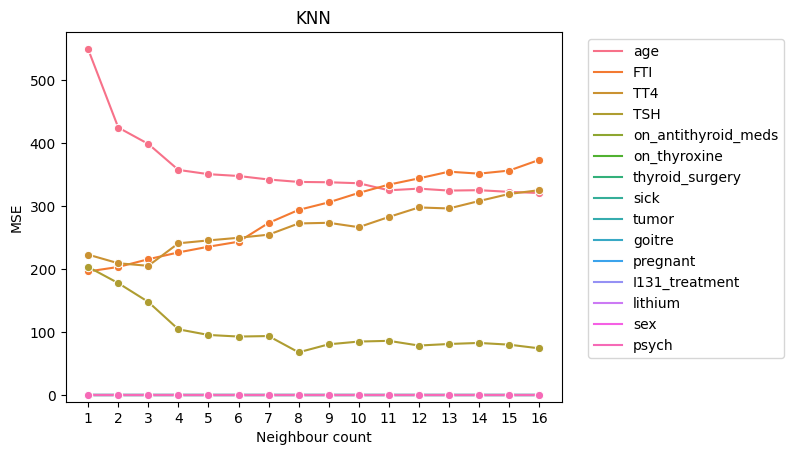

In [13]:
sns.lineplot(data=knn_mse_df[(knn_mse_df["col"] != "T3") & (knn_mse_df["col"] != "T4U")], x="neighbours", y="val", hue="col", marker="o")
plt.ylim(-10, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.xticks(neighbour_range)
plt.title("KNN")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

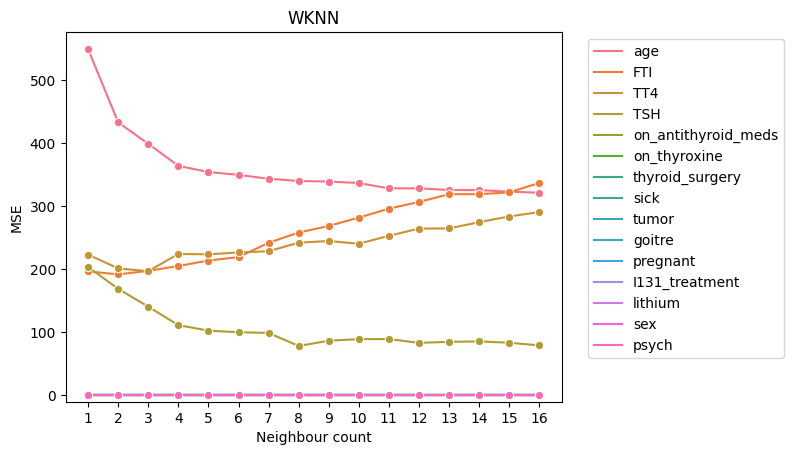

In [14]:
sns.lineplot(data=wknn_mse_df[(wknn_mse_df["col"] != "T3") & (wknn_mse_df["col"] != "T4U")], x="neighbours", y="val", hue="col", marker="o")
plt.ylim(-10, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.title("WKNN")
plt.xticks(neighbour_range)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

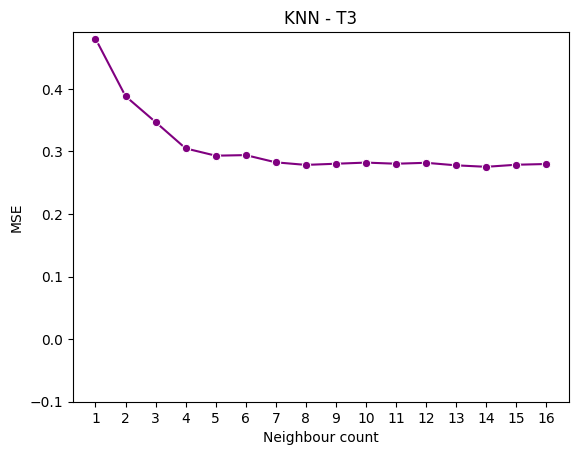

In [15]:
sns.lineplot(data=knn_mse_df[(knn_mse_df["col"] == "T3")], x="neighbours", y="val", marker="o", color="purple")
plt.ylim(-0.1, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.xticks(neighbour_range)
plt.title("KNN - T3")
plt.show()

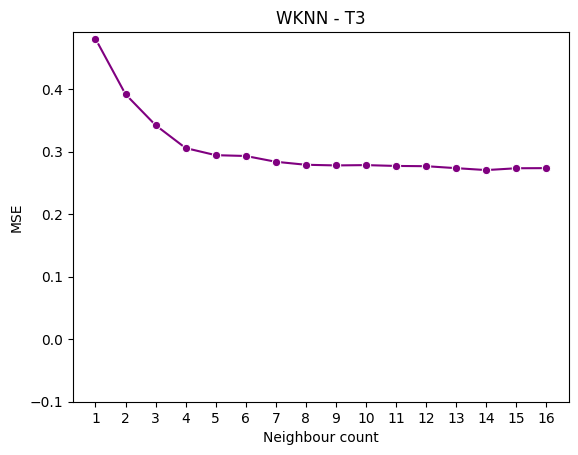

In [16]:
sns.lineplot(data=wknn_mse_df[(wknn_mse_df["col"] == "T3")], x="neighbours", y="val", marker="o", color="purple")
plt.ylim(-0.1, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.xticks(neighbour_range)
plt.title("WKNN - T3")
plt.show()

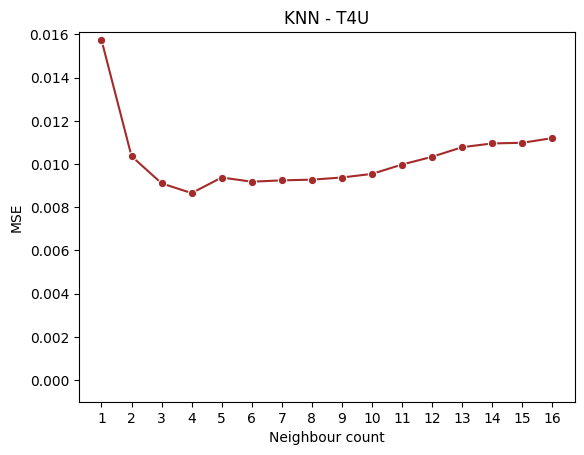

In [17]:
sns.lineplot(data=knn_mse_df[(knn_mse_df["col"] == "T4U")], x="neighbours", y="val", marker="o", color="brown")
plt.ylim(-0.001, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.xticks(neighbour_range)
plt.title("KNN - T4U")
plt.show()

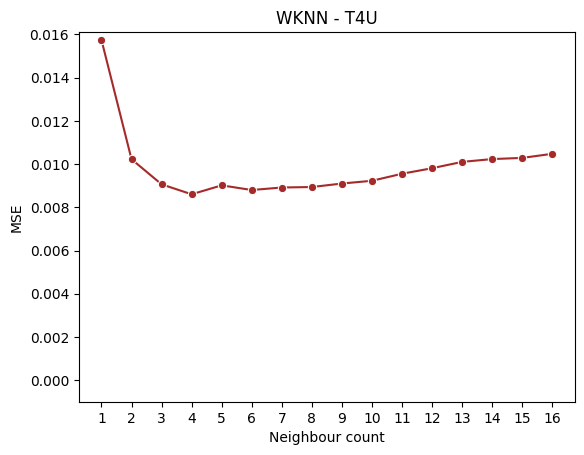

In [18]:
sns.lineplot(data=wknn_mse_df[(wknn_mse_df["col"] == "T4U")], x="neighbours", y="val", marker="o", color="brown")
plt.ylim(-0.001, plt.ylim()[1])
plt.ylabel("MSE")
plt.xlabel("Neighbour count")
plt.xticks(neighbour_range)
plt.title("WKNN - T4U")
plt.show()